<a href="https://colab.research.google.com/github/Qntumth/metodos_numericos/blob/main/ZEROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\blacksquare$ El método de bisección.

Muchas ideas en este notebook nos conducirá a metodos para resolver $f(x)=0$, que estan basados en temas de calculo (y un poco de analisis). Uno de los métodos más simples es el de _bisección_ el cual esta basado en el teorema del valor intermedio. Supongamos que $f$ es continua en un intervalo $[a,b]$ y que $f(a)*f(b)<0$ (es decir, $f(a)$ y $f(b)$ son de signos opuestos). Entonces por el teorema del valor intermedio, hay una solución entre $a$ y $b$.


En cada iteración establecemos un valor $m$ tal que es el punto medio del intervalo de la iteración $n$, $[a_n,b_n]$. Si $f(a_n)$ y $f(m_n)$ tienen puntos opuestos, entonces la solución debe de estar entre $a_n$ y $m_n$. En cambio, si $a_n$ y $m_n$ tienen el mismo signo, entonces la solución debe de estar entre $b_n$ y $m_n$. Y repetir el procedimiento con el nuevo intervalo.

Sin embaro, este proceso puede continuar hasta que encontremos una solución con una aproximación deseada, esta es llamada _tolerancia_. Un posible criterio para detener este proceso es cuando el largo del intervalo $b-a$ es menor que una cierta tolerancia.

En la parte de abajo expresamos el codigo del metodo de bisección.


In [ ]:
import numpy as np

def bisecction(f, a, b, tolerancia):
  fa = f(a)
  fb = f(b)
  contador = 0
  if fa*fb > 0:
    return 'No hay una solución en el interavalo dado.'
  while (np.abs(b-a) > 2*tolerancia):
    contador = contador + 1
    m = (a+b)/2
    fm = f(m)
    if (fa * fm < 0):
      b = m
    elif (m == 0):
      break
    else:
      a = m
    value = (a+b)/2
  return value, contador


_Ejemplo 1._ Use el metodo de bisección para resolver

$$x-\cos x -1 =0$$
con una tolerancia de 0.00001.

Solución.
Con $f(x)=x-\cos x-1$, vemos facilmente que $f(0)=-2$, mientras que $f(\pi/2)=\pi/2$. Asi que

In [ ]:
def fcn1(x):
  k = x-np.cos(x)-1
  return k

sol = bisecction(fcn1, 0, 0.5*np.pi, 1e-5)
sol
#Observemos que 
zero = fcn1(sol)
zero

7.5385139934880385e-06

_Ejemplo 2_ Use el método de bisección para encontrar las soluciones positivas de la ecuación $f(x)=e^x-5x+2$ por el método de bisección.

**Solución.** Usando el método anteriormente definido y creando la funcion f(x) en python. Sin embargo, primero graficamos la función para hallar un intervalo donde posea alguna raíz.

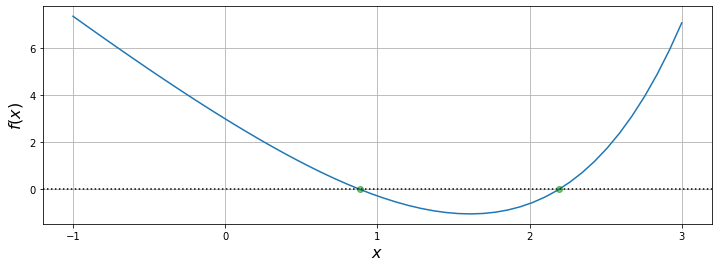

In [ ]:
import matplotlib.pyplot as plt

def f2(x):
  return np.exp(x)-5*x+2

dom = np.linspace(-1,3,50)
f = np.exp(dom)-5*dom+2
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(dom, f, lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$f(x)$',fontsize=16)
ax.set_xticks([-1,0,1,2,3])
ax.grid(True)

solution = Bisecction(f2,0.5,1,1e-5)
solution2 = Bisecction(f2,2,2.5,1e-5)
ax.plot(solution, f2(solution), 'go', alpha=.5, color='g')
ax.plot(solution2, f2(solution2), 'go', alpha=.5, color='g')

Text(0.5, 1.0, 'Método de Bisección ')

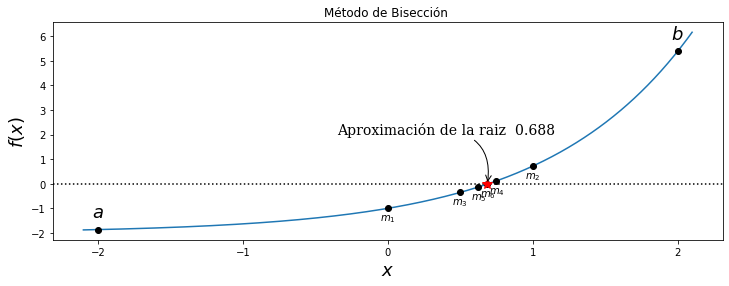

In [ ]:
#EJEMPLO PERROTE DE GRAFICA DEL METODO DE BISECCION.
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)
# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
# encuentre la raiz usando el método de biseccion y visualize
# los pasos en la visualización 
fa, fb = f(a), f(b)
ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)
n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    if np.sign(fa) == np.sign(fm):
            a, fa = m,fm
    else:
            b, fb = m, fm
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Aproximación de la raiz  %.3f" % m,
fontsize=14, family="serif",
xy=(a, fm), xycoords='data',
xytext=(-150, +50), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3, rad=-.5"))
ax.set_title("Método de Bisección ")

----
#$$\text{Ejercicios}$$
----

1 . Muestre que la ecuación 

$$3x³-5x²-4x+4=0$$

tiene una raiz en el intervalo $[0,1]$. Use el metodo de biseccion para obtener un intervalo de largo menor a 1/8 que contenga esta solución. Cuantass iteraciones deberán de ser necesarias para obtener su solucion con un error menor que $10⁶$.

**Solución.** Sea $f(x)=3x³-5x²-4x+4 $ veamos que 

$$f(0)=4, \hspace{0.5cm} f(1)=-2.$$

luego, como $f$ es continua sobre todo los reales, sobre 0 y 1 exite un $x$ tal que $f(x)=0$.

Usando codigo en pyhton,

In [ ]:
def f(x):
  return 3*x**2-5*x**2-4*x+4

root_a = bisecction(f,0,1,0.125)
root_a[0]

0.625

finalmente encontramos cuantas iteraciones son necesarias para poder calcular la raiz con la precision deseada

In [ ]:
root_b = bisecction(f,0,1,1.0e-6)
root_b

(0.732050895690918, 19)

2 . Muestre que la ecuación $e^x-3x-1=0$ tiene solo una solución positiva, y que se encuentra en el intervalo $[1,3]$. Use el método de biseccion para encontrar la solucion positiva de esta ecuacion con un error menor a $10^{-5}$.

**Solucion.** Sea $f(x)=e^x-3x-1$, observemos que

$$f(1)=e-4<0 \hspace{0.5cm} f(3)=e³-9>0$$

por tanto, exite una raiz en el intervalo dado.

In [ ]:
def f1(x):
  return np.exp(x)-3*x-1

root_c = bisecction(f1,1,3,1e-5)
root_c[0]

1.9038162231445312

#$\blacksquare $ Método del Punto Fijo.

Aunque el metodod de biseccion nos da una manera simple y reiterable para resolver una ecuación, si la funcion $f$ es más complicada (talves sus valores pueden ser obtenidos de una ecuación diferencial) o si la tarea es el mejorar para diferentes valores para algunos parametrosm entonces necesitamos una tecnica más.

  La iteración del punto fijo aplica para problemas en el caso especial donde $f(x)=0$ puede ser rescrito en la forma
  $$x=g(x),\hspace{1cm}(*)$$
  bajo este nuevo reordenamiento, podemos usarlo para definir un peoceso como sigue. Dada una iteracion inicial $x_0$, o estimamos por donde podría estar la solución, entonces una secuencia puede ser definida por $x_n$ con
  $$x_n=g(x_{n-1}),\hspace{1cm}, n=1,2,3,...$$
  Supusiendo que $g$ es continua, vemos que, si la secuencia iteratuva converge entonces los terminos se acercan más y más. Eventualmente obtenemos, para cualquier precision deseada 
  $$x_n \approx x_{n-1}$$
lo cual es decir, 

$$x_{n-1}\approx g(x_{n-1})$$

de esta forma, $x_n$ es aproximadamente una solución a la ec(*).

_Ejemplo 4._ Consideramos la ec, $x-\cos x -1 =0$, la cual obviamente se puede reescribir como

$$x=\cos x +1$$

La función de iteración es entonces $g(x)=\cos x + 1$. Consideremos como valor inicial a $x_0=1.374$. Entonces el sig. codigo nos dará los valores reiterados.

In [ ]:
import numpy as np

def g(x):
  return np.cos(x)+1

x0 = 1.374
for i in range(2,15):
  x1 = np.cos(x0)+1
  x0 = x1
  print(i,x1)

2 1.1955285036086822
3 1.366521727462937
4 1.2028568949157001
5 1.3596935416193299
6 1.209538330863799
7 1.3534513086142463
8 1.2156378669972474
9 1.347738940144136
10 1.2212122943043098
11 1.3425070292733194
12 1.2263115372441504
13 1.3377117804767544
14 1.2309797533297495


Lo cual parece que converge al mismo punto que en e metodo de biseccion,


Dado un problema $f(x)=0$, puede haber multiples manera de reformular la ecuacion de punto fijo. Por ejemplo, en el ejemplo anterior podriamos definir $g(x)$ como $g(x)=\arccos (x+1)$. Usanod el valor inicial $x_0$ anteriormente definido, despues de unas cuantas iteraciones, obetenemos los valores que no convergen a ningun lado.


Notemos que la función convergerá alguna solucion si $|g'(x)|<1$ atraves del inrervalo que contiene la solución. Veremos en el siguiente teorema que solo necesitamos la priemra derivada.

**Teorema 13.** Supongamos que $g$ es diferenciable  en $[a,b]$ y que 

1.   $g([a,b])\subset[a,b]$.(Esto es que, $g(x)\in [a,b]$, para toda $x\in[a,b]$).
2.   $\left| g'(x) \right|\leq K < 1$ para toda $x\in [a,b]$

entonces la ecuación $x=g(x)$ tiene una solución única en el intervalo $[a,b]$ y las secuencias definidas por 

$$x_0\in [a,b];\hspace{1cm}x_n= g(x_{n-1}), \hspace{0.5cm}n=1,2,...$$
converge hacia su solución.

_Ejemplo 5._ Consideremos la ecuación $e^x-5x+2=0$, de la cual ya sabemos que posee una raiz en el intervalo $[2,3]$. Existen tres posibles reorganizaciones para $x$, estas son 

$$
g_1(x)=x=\frac{e^x+2}{5},\\
g_2(x)=x=e^x-4x+2,\\
g_3(x)=x=\log (5x-2).
$$
En cada caso usaremos el valor inical $x_1=2.2$.


In [ ]:
import pandas as pd

v0 = np.zeros(20)
v1 = np.zeros(20)
v2 = np.zeros(20, dtype=np.float64)
v0[0], v1[0], v2[0] = 2.2, 2.2, 2.2
for i in range(1,20):
  v0[i] = (np.exp(v0[i-1])+2)/5
  v1[i] = np.exp(v1[i-1])+2-4*v1[i-1]
  v2[i] = (np.log(5*v2[i-1]-2))
data = {'Ec(1)':v0, 'Ec(2)':v1, 'Ec(3)':v2}
tabla = pd.DataFrame(data)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


{'Ec(1)': array([2.20000000e+00, 2.20500270e+00, 2.21405521e+00, 2.23055152e+00,
        2.26099931e+00, 2.31853409e+00, 2.43215372e+00, 2.67667447e+00,
        3.30733413e+00, 5.86244352e+00, 7.07164385e+01, 1.02988569e+30,
                   inf,            inf,            inf,            inf,
                   inf,            inf,            inf,            inf]),
 'Ec(2)': array([2.20000000e+00, 2.22501350e+00, 2.35355372e+00, 3.10868394e+00,
        1.19568206e+01, 1.55830869e+05,            inf,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan]),
 'Ec(3)': array([2.2       , 2.19722458, 2.19568149, 2.19482252, 2.19434405,
        2.19407744, 2.19392884, 2.19384601, 2.19379984, 2.1937741 ,
        2.19375975, 2.19375175, 2.19374729, 2.1937448 , 2.19374341,
        2.19374264, 2.19374221, 2.19374197, 2

Observemos que en lo dos primeras columnas, no parecen converger a algun dado, mientras qu el tercero parece que converge lentamente. El teorema 13 explica porque.



1.   Para la primera ecuacion, $g_1$, obtenemos que $g_1'=e^x/5$ para cada $x>\log 5 \approx 1.6.$. EL teorema indica que esta iteracion no deberia de converger para la solución $[2,3]$. Como sea, vemos que 0<$g'(x)$<1 para todo $x<\log 5$. También, si $0<x<\log 5<2$, entonces $g(x)\in (0.06,0.943)$. Se sigue que las coniciones de el teorema se satisface em este intervalo, por lo tantoesta iteración convergerá hacia esta solución. Con $x_1=0.9$, las primeras iteraciones sigue

   



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


xsol=0.9
def h(x):
  return (np.exp(x)+2)/5

vsol = np.zeros(20)
vsol[0] = xsol
for i in range(1,20):
  vsol[i] = h(vsol[i-1])
print(vsol[19], h(vsol[19])-vsol[19])

0.8842181555756256 -8.572113685545446e-09


Claramente, la solucion converge. La cual claramente, se ve que da una muy buena aproximado.

2. En este modo, $g(x)=e^x-4x+2$, así que $g'(x)=e^x-4$. ESto significa que $g'(x)$ para cada $x>\log 5$, y la expectación es que no converga en la solución en el intervalo $[2,3].$ Desafortunadamente, para esta reorganizacion podemos vereficar que la condicion del teroema 1 del teorema 13 no se satisface en ninguno. 

3. Usando el tercer arreglo, $g(x)=\log (5x-2)$, obtenemos que $g'(x)=\frac{5}{5x-2}$ el cual falla en entre 0.3846 y $0.6250$ para $x\in [2,3]$. Se sigue que $g$ incrementa, y por tanto, $g(2)=2.0794$, $g(3)=2.5649$ se sigue que las condiciones del teorema se satisfacen y la convergencia está garantizada por el teorema 13 para cualquier punto  $x\in[2,3]$.

# $\blacksquare$ Método de Newton.

EL metodo de newton es uno de los más ampliamente usados para resikver sistemas no lineales y este metodo puede ser derivado de ideas basicas del calculo de una variable y de la noción de aproximar una funcion no linear con una funcion lineal. Es más, la convergencia de un metodo iterativo en el ejemplo 5 es ampliado que rapido converge fue cuando $g'(s)=0$.


ESta es la motivacion detras del metodo de Newton, o del metodo de Newton-Raphson. La iteracion puede ser derivada en terminos del polinomio de primer grado del la aproximacion de Taylor, pero esencialmente un modelo local lineal usa la simple linea tangente a $f(x)$ esta debajo de esta idea.


Para ver esto, consideremos el problema original, no lineal $f(x)=0$. La primera expancion de Taylor de $f$ sobre el punto $x_0$ es

$$f(x)\approx f(x_0)+(x-x_0)f'(x_0)$$

la cual se parece mucho a la ecuacion de la linea tangente en el punto $x_0$ de $f(x)$. Si el punto $x_0$ es cerca a la solucion requerida $s$, entonces podemos esperar que estableciendo el lado derecho deberia de darnos una buena aproximacion a esta solución. Resolvemos $f(x_0)+(x-x_0)f'(x_0)=0$ (lo cuales es equivalente a encontrar en donde la linea tangente cruza el eje $x$) nos provee una expresión para nuestra siguiente aproximación

$$x_1 =x_0 - \frac{f(x_0)}{f'(x_0)}$$

Este proceso podria ser repetido para generar una secuencia de lineas tengentes, y las raices de esas rectas tangentes para generar la forma de la formula de _iteracion de newton_

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}\hspace{.5cm}(n=0,1,2,...)$$

El metodo de Newton por lo tanto usa la funcion de iteracion 

$$g(x)=x-\frac{f(x)}{f'(x)}$$

cuya derivada esta dada por

$$g'(x)=1-\frac{f(x)}{f(x)}+\frac{f(x)f''(x)}{[f'(x)]²}=\frac{f(x)f''(x)}{f'(x_0)}$$

desde que $f(s)=0$, se sigue que $g'(s)=0$ como se requeria, lo cual significa que el metodo de Newton convergerá cuadraticamente cuando este converga.

_Ejemplo 6_. Encuentre la raiz positiva de un numero real $c$ por el metodo de Newton.


**Solucion**. Para hallar, la raiz de c, el sistema no lineal puede ser puesto como
$$x²+c=0$$
entonces, la iteracion de Newton puede ser expresado como 

$$x_{n+1}=x_n- \frac{f(x)}{f'(x)}=x_n - \frac{x²_n-c}{2x_n}=\frac{x_n+c/x_n}{2}$$

para mostrar como las iteraciones progresan, sea $c=3$ y tomemos $x_0=1/2$.

In [ ]:
import numpy as np

#Programa general para el valor c y el numero de iteraciones.
c = int(input('Ingrese la constante positiva: '))
numiter = int(input('Ingrese el numero de iteraciones: '))
values = np.zeros(numiter)
valerror = np.zeros(numiter)
values[0] = 0.5
for i in range(1,numiter):
  values[i] = 0.5*(values[i-1]+(c/values[i-1]))
  valerror[i] = np.abs(values[i]-values[i-1])
print(values)
print('Los errores son',valerror)
input('Toque alguna tecla para terminar.')

Ingrese la constante positiva: 3
Ingrese el numero de iteraciones: 7
[0.5        3.25       2.08653846 1.76216324 1.73230809 1.73205083
 1.73205081]
Los errores son [0.00000000e+00 2.75000000e+00 1.16346154e+00 3.24375222e-01
 2.98551468e-02 2.57266531e-04 1.91062719e-08]
Toque alguna tecla para terminar.0


'0'

La convergencia cuadratica puede ser observada por nada en el exponente se duplica en cada iteracion.

Ahora consideraremos la implementacion del metodo de Newton para resolver $f(x)=0$ en python. Las entradas necesarias para la función, son $f$, su derivada, un valor inicial y la precision deseada. Esto podria necesitar una implementacion más robusta del metodo de Newton. Python y SciPy en particular tiene una rebusta construccion de 'equation solvers'.

In [ ]:
def newton(fcn, df, g, tol=1e-9):
  '''Resuelve la ecuacion fcn(x)=0 para la presición 'tol'
  usando el metodo de newton. Usando el valor inicial 'g'. 
  'fcn' y 'df' deben de ser funciones, y df debe de ser la derivada
  de 'fcn'.'''

  val = []
  old = g+1
  while np.abs(g-old)>tol:
    old = g
    g = old - fcn(old)/df(old)
    val.append(g)
  sol = g
  return val


_Ejemplo 7._ Resuelva la ecuacion $e^x-5x+2=0$ usando el metodo de Newton.

**Solucion**. Sabiamos que una solución se encuentra en [2,3] así que tomemos como valor inicial 2.5. Así


In [ ]:
def eq(x): #FUNCION DADA
  return np.exp(x)-5*x+2

def deq(x): #DERIVADA DE LA FUNCON EQ
  return np.exp(x)-5

sol = newton(eq, deq, 2.5, 1e-10)
sol

[2.2657507308869795,
 2.1990020960841123,
 2.1937726756131535,
 2.193741668931969,
 2.193741667845617,
 2.1937416678456176]

Mirando las iteraciones en general, es claro que existen varias cosas que pueden ir mal en la iteracion de Newton. La ec(1) significa que si $f'(x_n)$ es pequeño, entonces la correcion hecha en la iteracion $x_n$ será largo, i.e, si la derivada de $f$ es cero (o muy pequeño) cerca de la solucion, entonces el metodo de Newton podría no converger.

Tal situacion puede incrementarse si hay dos soluciones muy cerca juntas.


_Ejemplo 8._ Consideremos la ecuacion $\tan^{-1} (x-1)=0.5$ la cual tiene una unica solucion en $x=1.5463$ para cuatro decimales.

**Solución**. La funcion $f(x)=\tan^{-1} (x-1)-0.5$ es graficada abajo. Si iniciamos el metodo de Neweton en $x_0=4.2$. observaremos que no converge el método.

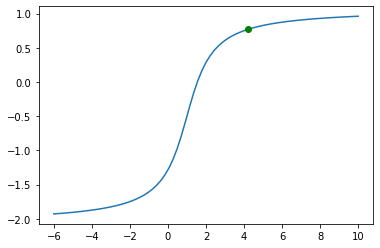

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


[-4.431324792639958,
 53.173241611359224,
 -2810.4696152291754,
 16362702.678634763,
 -286692840882641.75,
 1.702045172947086e+29,
 -3.1020517398016827e+58,
 1.9926703576316317e+117,
 -4.251848617775354e+234,
 inf,
 nan]

In [ ]:
import matplotlib.pyplot as plt

def eq2(x):
  return np.arctan(x-1)-0.5

def deq2(x):
  return 1/(x**2-2*x+2)

dom = np.linspace(-6,10,75)
plt.plot(dom,eq2(dom))
plt.plot(4.2,eq2(4.2), 'go')
plt.show()
sol = newton(eq2,deq2,4.2)
sol

Sin embargo, esta ecuacion en particular puede ser resuelta facilmente si rescribimos como $x=1+\tan(0.5)=1.5463025$ para obtener la solucion. Este reordenamiento trasnforma el problema original de una ecuacion a reslver a una ecuacion a evualar, la cual todavia es un problema computacionalmente.

El siguinte teorema explica las condiciones bajo las cuuales podemos esperar que el metodo de Newton converga. El teorema de convergencia global, tiene como hipotesis las cuales eliminan las posibilidades de cualquier punto de inflexicion cerca de la solucion

**Teorema 14** Sea $f$ doblemente derivable sobre un intervalo [a,b] y satisface las condiciones

1.   $f(a)f(b)<0$
2.   $f'$ no tiene ceros en [a,b]
3.   $f''$ no cambia de signo en el intervalo [a,b] y
4.   $\left| \frac{f(a)}{f'(a)} \right|*\left|\frac{f(b)}{f'(b)}\right|<b-a$

entonces $f(x)=0$ tiene una solucion unica en $s\in (a,b)$ y la iteracion de Newton convergera a $s$ para cualquier punto de inicio en el intervalo [a,b].


In [ ]:
#Ejercicio 2. Use el metodo de newton para obtener
#la solucion de la ecuacion e^x-3x-1=0 en el intervalo [1,3] usando la 
#tolerancia 10^-10.

def eq4(x):
  return np.exp(x)-3*x-1

def deq4(x):
  return np.exp(x)-3

sol = newton(eq4,deq4,2,1e-11)
sol

[1.9113576837112107,
 1.9038647124588381,
 1.9038136967936172,
 1.9038136944403836,
 1.9038136944403834]

#$\blacksquare$ El metood de la secante.


En la seccion previa, hemos visto que el metodo de newton es una herramienta poderosa para resolver estas ecuaciones, obteniendo soluciones de precisiones que convergen en condiciones apropiadas. Uno de los retos de la implementacion del metodo de newton es que requerimos la derivada de la función. En muchas aplicaciones del mundo real, la derivada puede que no este definida si por ejemplo, la funcion en si misma es el resultado de algun calculo. Un ejemplo importante de esto es mostrar metodos para soluciones de ecuaciones diferenciales. El metodo de la secante es un acercamiento a recubrir algo del poder del metodo de Newton sin usar ningun tipo de informacion sobre las derivadas.


EL metodo de Newton fue descrito por la idea de que la siguiente iteracion es el punto donde la linea tangente corta al eje x (es decir, es 0). El metodo de la secante isa el punto donde la secante, o la cuerda, que une los dos puntos previos de las dos iteraciones que cruzan el eje x


Para definir la iteracion, consideremos la ecuacion de la linea tangente que une los dos puntos de la curva $y=f(x)$ en $x=x_0$, $x_1$. La pendiente es $\frac{f(x_1)-f(x_0)}{(x_1-x_0)}$ y así la ecuacion de la linea secante es 

$$y-f(x_1)=\frac{f(x_1)-f(x_0)}{(x_1-x_0)}(x-x_1)$$

tomando $y=0$ en la ec. anterior y retomando que la solucion $x_2$ nos da la siguiente iteracion 
$$x_2=x_1-\frac{x_1-x_0}{f(x_1)-f(x_0)}f(x_1)$$

por tanto, la expresion para la linea tangente iterada es

$$x_{n+1}=x_n-\frac{x_{n}-x_{n+1}}{f(x_n)-f(x_{n+1})}f(x_1)$$

Notemos que es lo mismo que la ecuacion iterada de la linea tangente del metodo de newton si llevamos la pendiente a 0.

El metodo de la secante aparece que converge rapido pero podemos cuantificar la tasa de rapides de convergencia de manera más precisa. Hay teoremas de convergencia para este metodo similares a los del metodo de Newton, pero estos caen fuera de nuestro estudio. La conclusion principal es que cuando el metodo de la secante converge, lo hace a una tasa super lineal. Especificamente si $e_n$ es el error $x_n-s$, entonces la secuencia de errores satisfacen 

$$e_{n+1}\approx ce^{\alpha}_{n}$$

In [ ]:
import numpy as np

x = 0.5*(1+np.sqrt(5))
x

1.618033988749895

donde $\alpha=(1+\sqrt 5)/2\approx 1.618033988749895$. Esto puede ser interpretado como que el numero de decimales correctos se incrementa un 60% en cada iteracion, comparado al metodo Newton el cual el numero de decimales correctos se duplican cada iteracion.

_Ejemplo 10_. El metodo de la secante puede ser usado para calcular raices cuadradas. SI $f(x)=x²+c$ entonces la iteracion de la linea secante se convierte en

$$x_{n+1}=x_n-(x_n^2 - c)\frac{x_n - x_{n-1}}{x_n^2 - x_{n-1}^2}=\frac{x_n x_{n-1}+c}{x_n + x_{n-1}}.$$

retomemos, de la iteracion de newton tenemos 

$$x_{n+1}=\frac{x_n x_n + c}{x_n + x_n}$$

los cuales son similares, especialmente cuando la iteracion esta cerca a la solucion.

Para $c=3$, con el punto inicial es sugerido, $x_0=1/2$, $x_1=3/4$, entonces las siguientes iteraciones son

In [ ]:
def secc_tol(fcn, x0, x1, tol=1e-9):
  '''Resuelve la ecuacion fcn(x)=0 para la presición 'tol'
  usando el metodo de la secante. Usando el valor inicial 'x0' y 'x1'. 
  'fcn' deben de ser funcion.'''
  val = [x0,x1]
  n=2
  while np.abs(val[n-2]-val[n-1])>tol:
    m = (val[n-1]-val[n-2])/(fcn(val[n-1])-fcn(val[n-2]))
    g = val[n-1] - m*(fcn(val[n-1]))
    val.append(g)
    n = n + 1
  number_of_iters = n-2
  return val, number_of_iters


def secc_numiters(fcn, x0, x1, number_of_iterations):
  '''Resuelve la ecuacion fcn(x)=0 para el numero de iteraciones 'number_of_iterations'
  usando el metodo de la secante. Usando el valor inicial 'x0' y 'x1'. 
  'fcn' deben de ser funcion.'''
  val = [x0,x1]
  for n in range(2,number_of_iterations):
    m = (val[n-1]-val[n-2])/(fcn(val[n-1])-fcn(val[n-2]))
    g = val[n-1] - m*(fcn(val[n-1]))
    val.append(g)
  return val

In [ ]:
def eq3(x):
  return x**2 - 3


sol, iters = secc_tol(eq3, 0.5, 0.75, 1e-10)
sol[-1], iters

(1.7320508075688774, 8)

Ocho iteraciones aproximan a 10 decimales. Así que veemos que rapidamente converge sin usar ningun tipo de información sobre la derivada.

In [ ]:
#Ejercicios
#La ecuacion 3x**3 - 5x**2 - 4x + 4 tiene una solucion cerca de x=0.7. Calcule 
#las primeras cuatro iteraciones del metodo de bisecciones para obtener una
#solucion.

def eq3(x):
  return (3*x** - 5*x**2 - 4*x + 4)

sol = secc_numiters(eq3, 0.5, 1, 10)
sol[-1]


1.323506507162583



---


---

#$$\blacksquare \text{Metodo de Newton en dimensiones mayores.}$$


El tema central de esta seccion es reslver el sistema de ecuaciones no lineales de la forma 


$$\textbf{f(x)=0}$$

donde $\textbf{f}$ es un vector funcion del vector de la variable $\textbf{x}$. Despues, proveemos detalles sobre el caso de dos variables, pero empezamos con el caso mas general en el caso de _n_ ecuaciones con _n_ incognitas.
Mirando mas de cerca la ecuacion anterior, tenemos

$$\textbf{f(x)}=\begin{bmatrix} 
f_1 (x_1,x_2,...,x_n) \\ 
f_2 (x_1,x_2,...,x_n) \\ 
\vdots \\
f_n (x_1,x_2,...,x_n) \\ 
\end{bmatrix}=
\begin{bmatrix} 
0 \\ 
0 \\ 
\vdots \\
0 \\ 
\end{bmatrix}=0
$$

Así que el problema es ahora encontrar el vector _n_-dimensional $\textbf{x=}\left[ x_1,x_2,...,x_n\right]^T$ que satisface simultaneamente las ecuaciones $f_i(\textbf{x})=0$ para $i=1,2,...,n$.

##▶ Método de Newton: Para dos ecuaciones con dos incognitas.

El caso para $n=2$ es mucho mas manejable, es mucho mas facil obtener una formula directa para la linea tngente iterativa sin tener que resolver un sistema lineal de ecuaciones en cada iteracion.

Para dos ecuaciones, el problema puede ser expresado como

$$f_1 (x,y)=0,\\ f_2(x,y)=0.$$

La primera expansion de Taylor de esas funciones es

$$f_1 (x+h,y+k)\approx f_1(x,y)+hf_{1x}(x,y)+kf_{1y}(x,y),\\
f_2 (x+h,y+k)\approx f_2(x,y)+hf_{2x}(x,y)+kf_{2y}(x,y)
.$$

igualando ambos lados igual a cero, y despejando $h$ y $k$.

$$h=\frac{-f_1 f_{2y}+f_2 f_{1y}}{f_{1x}f_{2y}-f_{1y}f_{2x}}\\
k=\frac{-f_1 f_{2x}- f_2 f_{1x}}{f_{1x}f_{2y}-f_{1y}f_{2x}}
$$

donde todas las funciones estan evaluadas en $(x,y)$.

La iteracion de Newton para el par de ecuaciones en dos variables es por lo tanto $$x_{n+1}=x_n +h, \hspace{1cm} y_{n+1}=y_n + k$$
donde $(h,k)$ estan dadas anteriormente en $(x_n, y_n)$.

_Ejemplo 12_. Encuentre las coordenadas de las intersecciones en el primer cuadrante de la elipse $4x²+y²=4$ y las curvas $x²y³=1$. Usando el metodo de Newton para dos variables.

**Solucion**. Una solucion esta cerca de (0.4,1.8) y usaremos ese punto como punto inicial para la iteracion. Las derivadas parciales de las funciones $f_1(x,y)=4x²+y²-4$ y $f_2(x,y)=x²y³-1$ son

$$f_{1x}(x,y)=8x,\hspace{1cm} f_{1y}(x,y)=2y \\
f_{2x}(x,y)=2xy³,\hspace{1cm} f_{1y}(x,y)=3x²y² \\
$$

en el punto $x_0=(0.4,1.8)$, tenemos que $f_1(x_0)=-0.12$ y $f_2(x_0)=-0.06688$. Y $f_{1x}(x_0)=3.2$, $f_{1y}(x_0)=3.6$, $f_{2x}(x_0)=4.6656$ y $f_{2y}(x_0)=1.5552$. Por tanto, $f_{1x}f_{2y}-f_{1y}f_{2x}=(3.2)(1.552)-(3.6)(4.6656)=-11.81952$. Ahora aplicando la formula de $h$ y $k$, obtenemos

$$h=\frac{-(-0.12)(1.5552)-(-0.06688)(3.6)}{-11.81952}=4.35808967\times 10³ \\
k=\frac{(-0.12)(4.6656)-(-0.06688)(3.2)}{-11.81952}=2.9261425\times 10²
$$

así, 

$$x_1 = 0.4 + 4.35808967\times 10³=0.4045809$$
$$y_1 = 1.8 + 2.9261425\times 10² = 1.8292614$$

las iteraciones subsecuentes son mas complicadas de calcular. Para ello, hacemos el codigo que nos perimita calcular esos puntos.

In [ ]:
def newton_d2(fcn, jac, g, tol=1e-8):
  '''Resuelve las dos ecuaciones dadas por fcn(x)=0 a una precision 'tol'
  usando el metodo de newton para dos variables y dos funciones. Usando a 'g'
  como punto inicial. 'fcn' y 'jac' debe de ser funciones donde existen sus
  derivadas parciales.'''

  old = np.zeros_like(g)
  old[0] = g[0] + 1
  n = 0
  while max(abs(g-old))>tol:
    n = n + 1
    old = g
    f = fcn(old)
    f1 = f[0]
    f2 = f[1]
    J = jac(old)
    f1x = J[0,0]
    f1y = J[0,1]
    f2x = J[1,0]
    f2y = J[1,1]
    D = f1x*f2y - f1y*f2x
    h = (f2*f1y - f1*f2y)/D
    k = (f1 * f2x - f2 * f1x)/D
    g = old + np.array([h,k])
    if n > 100000 :
      break
  if n < 100000:
    return g
  if n > 100000:
    return 'No converge'


In [ ]:
def Veq1(v):
  ''' La funcion como entrada 'v' y la salida es un vector en R2'''
  x,y = v
  f = np.empty(2)
  f[0] = 4*x**2+y**2-4
  f[1] = x**2 * y**3 - 1
  return f

def JVeq1(v):
  ''' El jacobiano de las funciones Veq1'''
  x,y = v
  J = np.empty((2,2))
  J[0,0] = 8 * x
  J[0,1] = 2 * y
  J[1,0] = 2 * x * y**3
  J[1,1] = 3 * x**2 * x**2
  return J


In [ ]:
s = newton_d2(Veq1,JVeq1,[0.8,1.2],0.5e-4)
s

'No converge'

In [ ]:
import numpy as np

n = 10
d = np.eye((n))*4
d_p1 = -1*np.eye(n,k=1) 
d_l1 = -1*np.eye(n,k=-1)
matrix = d+d_p1+d_l1 
b = np.array([9,5,5,5,5,5,5,5,5,5])

array([[ 4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4.]])